**This is the code for the machine learning model**

In order to use this code, your data must be saved as **"TotalTrafo.csv"** in the same folder as this code

In [1]:
#import neccessary tools and the csv file "Housing"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv("TotalTrafo.csv")

In [2]:
#Look at the data and shape it, so the right format is used and it can be seperated
dir(data)
type(data.Trafo2)

pandas.core.series.Series

In [3]:
# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
Y = data['Trafo2']

#cyclic decoding of the hours (0-23) to sin and cosine values
data['hour_sin'] = np.sin(2 * np.pi * data['Hour']/23.0)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour']/23.0)

X = data.drop(['Trafo1', 'Trafo2', 'datetime', 'Trafo_Total', 'Month', 'Day', 'Hour'],axis=1)

#check the format and the shape of the data again
print(X)
#print(Y)

      Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  Wind Speed  \
0           1     -4.70       2.2       -5.23      1012        97        1.18   
1           1     -5.20       2.7       -4.92      1012        94        1.00   
2           1     -5.70       2.0       -5.48      1012        92        1.00   
3           1     -5.00       1.7       -5.10      1012        93        0.52   
4           1     -4.64       0.0       -5.64      1012        93        1.00   
...       ...       ...       ...         ...       ...       ...         ...   
8755        1     -2.30       8.4       -1.54      1016        41        4.00   
8756        1     -3.00       7.8       -3.70      1017        48        6.00   
8757        1     -2.20       7.1       -0.42      1018        60        2.00   
8758        1     -2.30       6.9       -1.94      1019        53        3.34   
8759        1     -2.50       6.9       -2.17      1020        53        2.98   

          hour_sin  hour_co

In [4]:
data.Trafo2.shape

(8760,)

In [5]:
data['Trafo2']

0       17.86
1       19.58
2       18.18
3       16.83
4       17.54
        ...  
8755    26.88
8756    20.86
8757    12.54
8758    20.61
8759    17.41
Name: Trafo2, Length: 8760, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train, sample_weight = None)

LinearRegression()

In [8]:
predictions = lr.predict(X_test)
len(predictions)

1752

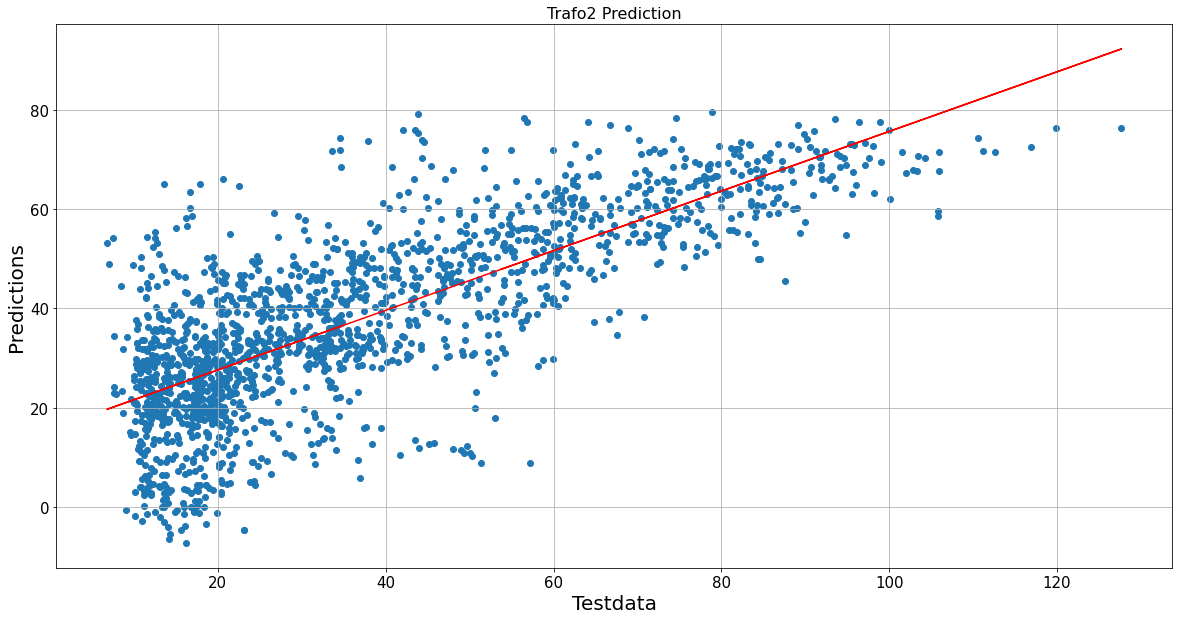

In [9]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.scatter(Y_test, predictions)
plt.title('Trafo2 Prediction', fontname='sans-serif', fontsize=16)
plt.xlabel("Testdata", fontsize=20)
plt.ylabel("Predictions", fontsize=20)
plt.grid(True)

#add a linear polynomial fit line to the plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(Y_test, predictions, 1)
plt.plot(Y_test, b + m * Y_test, '-r')

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE2 = r2_score(Y_test, predictions)
RMSE2 = np.sqrt(mean_squared_error(Y_test, predictions))
RMSE2 = round(RMSE2, 2)
MAE2 = round(MAE2, 4)

In [16]:
txt1 = "The R2 score is {MAE2}".format(MAE2 = MAE2)
txt2 = "With this model we can predict the energy consumption of Trafo 2 on a specific day within the range of \033[1m {RMSE2} kW".format(RMSE2 = RMSE2)

print(txt1)
print(txt2)

The R2 score is 0.5867
With this model we can predict the energy consumption of Trafo 2 on a specific day within the range of  15.28 kW


In [14]:
Trafo2_pred = predictions
print(Trafo2_pred)

[41.24179641 62.74975027 52.84649875 ... 21.86894304 50.73710412
 36.99686053]
